In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
X = df[['Hours_Studied','Attendance','Physical_Activity']]
y = df['Exam_Score']

# model train
model = LinearRegression()
model.fit(X,y) 
prediction_score = model.predict(X) 

# Valid regression metrics 
mae = mean_absolute_error(y, prediction_score)
mse = mean_squared_error(y, prediction_score)
rmse = np.sqrt(mse) 
r2 = r2_score(y, prediction_score)


""" 
3.1445
round(3.1445, 2) -> 3.14

"""

print(f"Mean Absolute Error (MAE): {round(mae, 2)}")
print(f"Mean Squared Error (MSE): {round(mse, 2)}")
print(f"Root Mean Squared Error (RMSE): {round(rmse, 2)}")
print(f"R^2 Score (Model Accuracy): {round(r2, 4)}") # value between 1 to 0 and closer to 1 = better



Mean Absolute Error (MAE): 1.52
Mean Squared Error (MSE): 6.92
Root Mean Squared Error (RMSE): 2.63
R^2 Score (Model Accuracy): 0.5428


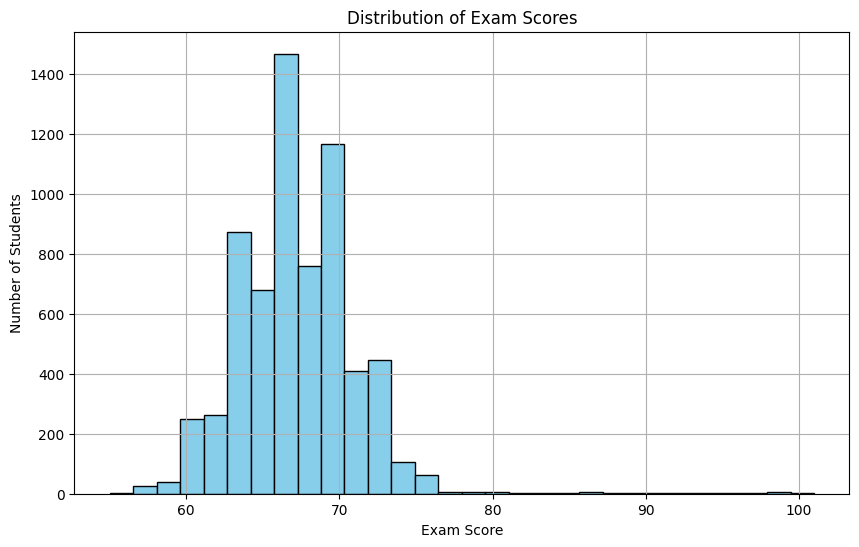

In [5]:
plt.figure(figsize=(10, 6)) 
plt.hist(df["Exam_Score"], bins= 30, color='skyblue', edgecolor='black')
plt.title("Distribution of Exam Scores")
plt.xlabel("Exam Score")
plt.ylabel("Number of Students")
plt.grid(True)
plt.show()

In [6]:
# plt.figure(figsize=(10, 6))
# plt.scatter(X,y, color = 'blue', label = "Actual Scores")
# plt.plot(X, prediction_score, color = 'red', label = "Predicted Scores (Regression Line)")
# plt.title("Model Prediction vs Actual Score")
# plt.xlabel("Study Hours per Week")
# plt.ylabel("Exam Score")
# plt.grid(True)
# plt.show()


In [7]:
new_hours = int(input("Enter hours: "))
predicted_new_score = model.predict([[new_hours, 100,4]])
print(f"Predicted Exam Score for {new_hours} hours is {predicted_new_score} Score")

Predicted Exam Score for 40 hours is [77.20913934] Score


c:\Users\hp\Desktop\Machine_Learning\mlvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
